In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read in the data
df = pd.read_csv(r'C:\Case Studies Andreas Wacker\2022-03-13 Movie Industry\movies.csv')


In [3]:
# 1.Step - Data Cleaning: First look in the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# 1.Step - Data Cleaning: Is data missing?

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}  {}%'.format(col, pct_missing))

name  0.0%
rating  0.0%
genre  0.0%
year  0.0%
released  0.0002608242044861763%
score  0.0003912363067292645%
votes  0.0003912363067292645%
director  0.0%
writer  0.0003912363067292645%
star  0.00013041210224308815%
country  0.0003912363067292645%
budget  0.2831246739697444%
gross  0.02464788732394366%
company  0.002217005738132499%
runtime  0.0005216484089723526%


In [6]:
# 1.Step - Data Cleaning: Because only minuscule amounts of data is missing, the rows which have missing data will be dropped.

df = df.dropna()

In [7]:
# 1.Step - Data Cleaning: Data types of the columns 

df.dtypes

name         object
rating         int8
genre          int8
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# 1.Step - Data Cleaning: Change data types of columncs with float64 to int64 for better visualization. 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [9]:
# 1.Step - Data Cleaning: The year is not always alligned with the release column. Extracting the year from the release column for cleaner data. 

df['year_from_released_column'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [10]:
# 1.Step - Data Cleaning: Sorting data after gross

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_from_released_column
5445,Avatar,5,0,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,5,0,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,5,6,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,5,0,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,5,0,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,3,6,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,6,10,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982
2417,Madadayo,-1,6,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993


In [11]:
# 1.Step - Data Cleaning: Drop and duplicates

df['company'].drop_duplicates().sort_values(ascending=True)

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
2929                          1492 Pictures
385                        1818 Productions
                       ...                 
6420                                   erbp
6793                             i am OTHER
4007                               i5 Films
5664                            micro_scope
7129                                thefyzz
Name: company, Length: 1480, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

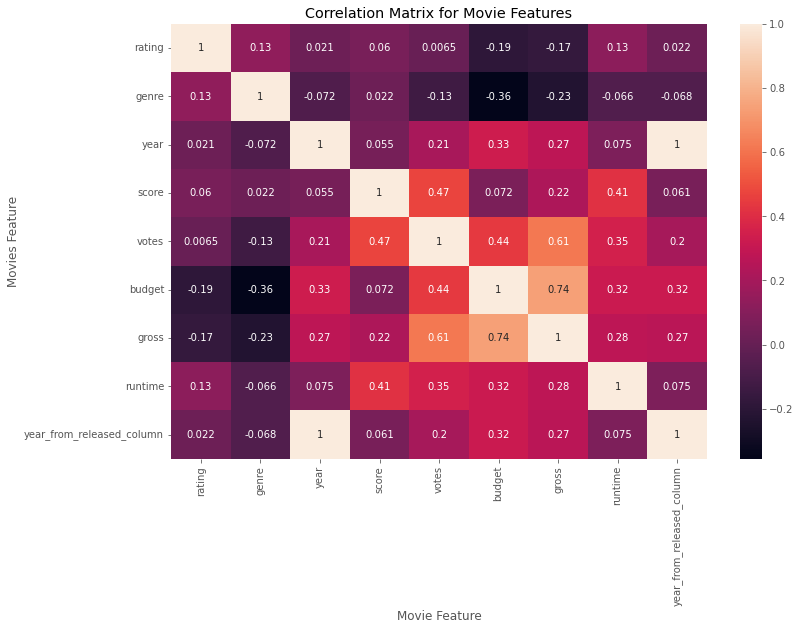

In [12]:
# 2. Step - Correlation: Correlation of different Movie features

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Movie Features')

plt.xlabel('Movie Feature')
plt.ylabel('Movies Feature')

plt.show

In [15]:
# 2. Step - Correlation: Sorting of Columns
df = df.reindex(sorted(df.columns), axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

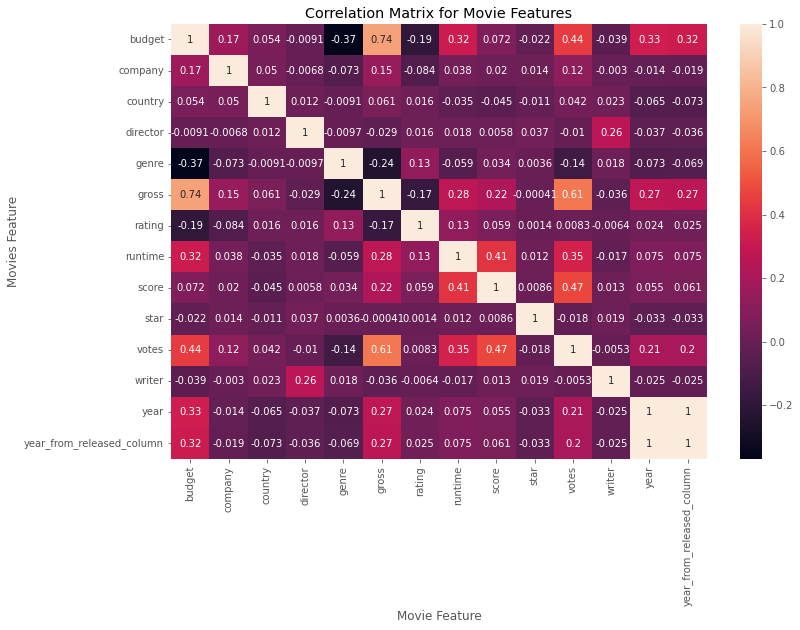

In [18]:
# 2. Step - Correlation: High correlation between gross and budget

# Further Investigation: Integration of nun-numeric features for correlation

df['rating']=df['rating'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['company']=df['company'].astype('category').cat.codes

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Movie Features')

plt.xlabel('Movie Feature')
plt.ylabel('Movies Feature')

plt.show


In [24]:
# 2. Step - Correlation: Showing only high correlation

correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_correlation = sorted_pairs[(sorted_pairs) > 0.6]

high_correlation 

# High correlation only between 1. votes & gross 2. budget & gross

votes                      gross                        0.614824
gross                      votes                        0.614824
                           budget                       0.740362
budget                     gross                        0.740362
year_from_released_column  year                         0.998639
year                       year_from_released_column    0.998639
budget                     budget                       1.000000
writer                     writer                       1.000000
votes                      votes                        1.000000
star                       star                         1.000000
score                      score                        1.000000
runtime                    runtime                      1.000000
rating                     rating                       1.000000
gross                      gross                        1.000000
genre                      genre                        1.000000
director                 

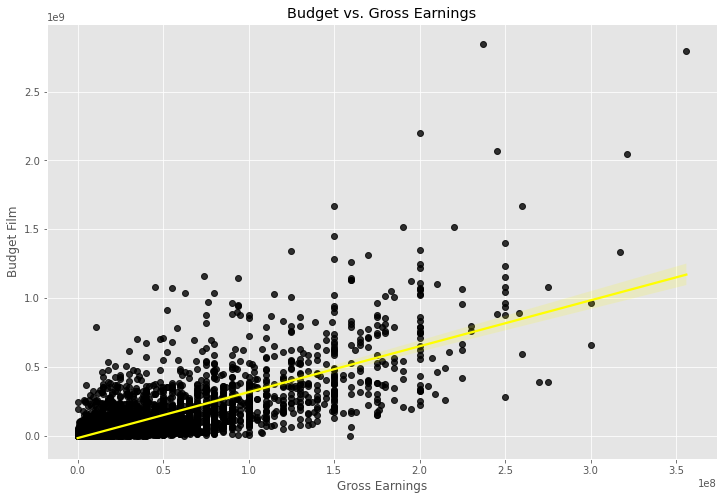

In [14]:
# 3. Visualization of high Cor: Plot budget vs. gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color" : "yellow"})
plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget Film')


plt.show()

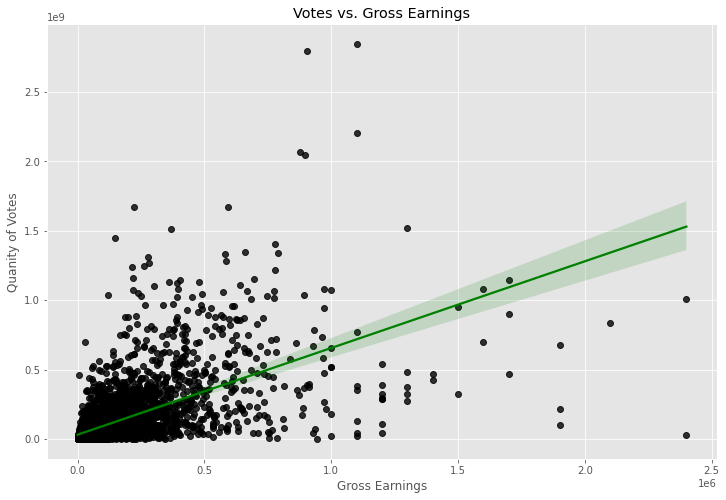

In [25]:
# 3. Visualization of high Cor: Plot Votes vs. gross using seaborn
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color" : "green"})
plt.title('Votes vs. Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Quanity of Votes')


plt.show()